# Raw file metrics for method development with AlphaRaw
This notebook shows how alpharaw can be used to calculate usefull raw file metric for method development.
All Metrics are calculated directly for a set of Thermo raw files independent of identifications.

## 1. Load the raw files
We will start by downloading for example raw files but users can provide their own in the same format.

In [96]:
%reload_ext autoreload
%autoreload 2

from alpharaw import thermo
import tempfile
from alphabase.test_data_downloader import DataShareDownloader
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
temp_folder = tempfile.TemporaryDirectory()
print(f"Data will be downloaded to {temp_folder.name}")

Data will be downloaded to /var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k


In [98]:
url_list = [
    'https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw',
    'https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw',
    'https://datashare.biochem.mpg.de/s/JwxcW4kp4Vxb57e/download?files=20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw',
    'https://datashare.biochem.mpg.de/s/JwxcW4kp4Vxb57e/download?files=20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw',
]

output_path = []

for url in url_list:
    output_path.append(DataShareDownloader(url, temp_folder.name).download())

# Users want to set their own path to the thermo raw file
"""
output_path = [
    '/path/to/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw',
    '/path/to/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw',
    '/path/to/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw',
    '/path/to/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw',
]
"""

/var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw does not yet exist


100% |########################################################################|


20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw successfully downloaded to /var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw
/var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw does not yet exist


100% |########################################################################|


20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw successfully downloaded to /var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw
/var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw does not yet exist


100% |########################################################################|


20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw successfully downloaded to /var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw
/var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw does not yet exist


20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw successfully downloaded to /var/folders/l0/0518479j4gvcb4cyl20vmkrm0000gn/T/tmpvw6wyn1k/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw


"\noutput_path = [\n    '/path/to/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw',\n    '/path/to/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw',\n    '/path/to/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_02.raw',\n    '/path/to/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_03.raw',\n]\n"

## 2. Import files in AlphaRaw
We will import the files with alphaRaw so we can access the individual spectral

In [99]:
raw_file_list = []

for file in output_path:
    auxiliary_items = ['injection_time','faims_cv']
    raw_file = thermo.ThermoRawData(auxiliary_items=auxiliary_items)
    raw_file.load_raw(file)
    raw_file_list.append(raw_file)

49it [00:17,  2.87it/s]
49it [00:17,  2.78it/s]
21it [00:08,  2.42it/s]
21it [00:08,  2.39it/s]


## 3. Define Metrics
Define metrics to be calculated on the raw files. Each metric is a single function which is called on the raw file list.

In [102]:
def shorten_file_name(file_name: str, chars: int = 10) -> str:
    """Shorten the file name to the first and last chars separated by ...

    Parameters
    ----------
        file_name : str
            File name to shorten

        chars : int, optional
            Number of characters to keep at the start and end of the file name, by default 10

    Returns
    -------
        str
            Shortened file name

    """
    return file_name[:chars] + '...' + file_name[-chars:]

def ms2_injection_time(raw_file_list: list[thermo.ThermoRawData]):
    """Plot the MS2 injection time for each file in the list of raw files.

    Parameters
    ----------
        raw_file_list : list[thermo.ThermoRawData]
    """

    # accumulate ms2 injection time
    _stat_df = []
    for raw_file in raw_file_list:
        file_name = os.path.basename(raw_file._raw_file_path)

        for ms_level in raw_file.spectrum_df['ms_level'].unique():
    
            _local_stat_df = raw_file.spectrum_df[raw_file.spectrum_df['ms_level'] == ms_level][['spec_idx','injection_time','ms_level']]
            _local_stat_df = _local_stat_df.rename(columns={'injection_time':'ms2_injection_time'})
            _local_stat_df['file_name'] = shorten_file_name(file_name)

            _stat_df.append(_local_stat_df)

    _stat_df = pd.concat(_stat_df)

    #plotting
    fig, ax = plt.subplots()
    sns.boxplot(x='file_name', y='ms2_injection_time', hue='ms_level', data=_stat_df, ax=ax, palette='Set1', fill=False)
    ax.set_title('Injection time')
    ax.set_ylabel('Injection time (ms)')
    ax.set_xlabel('File name')
    # 90 degree rotation of x-axis labels
    plt.xticks(rotation=90)
    plt.show()

def gradient_length(raw_file_list: list[thermo.ThermoRawData]):
    """Plot the gradient length for each file in the list of raw files.

    Parameters
    ----------
        raw_file_list : list[thermo.ThermoRawData]
    """

    # accumulate gradient length
    _stat_df = []
    for raw_file in raw_file_list:
        file_name = os.path.basename(raw_file._raw_file_path)

        _delta_rt = raw_file.spectrum_df['rt'].max() - raw_file.spectrum_df['rt'].min()
        _stat_df.append({'file_name': shorten_file_name(file_name), 'gradient_length': _delta_rt})

    _stat_df = pd.DataFrame(_stat_df)

    #plotting
    fig, ax = plt.subplots()
    sns.barplot(x='file_name', y='gradient_length', data=_stat_df, ax=ax)
    ax.set_title('Gradient length')
    ax.set_ylabel('Gradient length (min)')
    ax.set_xlabel('File name')
    # 90 degree rotation of x-axis labels
    plt.xticks(rotation=90)
    plt.show()

def ms_range(raw_file_list: list[thermo.ThermoRawData]):
    """Plot all ms2 scans for each file in the list of raw files.

    Parameters
    ----------
        raw_file_list : list[thermo.ThermoRawData]
    """

    # accumulate gradient length
    _stat_df = []
    for raw_file in raw_file_list:
        file_name = os.path.basename(raw_file._raw_file_path)

        ms2_scans = raw_file.spectrum_df[raw_file.spectrum_df['ms_level'] == 2]['precursor_mz'].unique()
        _local_stat_df = pd.DataFrame({'file_name': shorten_file_name(file_name), 'ms2_scans': ms2_scans})
        _stat_df.append(_local_stat_df)

    _stat_df = pd.concat(_stat_df)

    #plotting
    fig, ax = plt.subplots()
    sns.scatterplot(x='file_name', y='ms2_scans', data=_stat_df, ax=ax)
    ax.set_title('MS2 Range')
    ax.set_ylabel('m/z')
    ax.set_xlabel('File name')

    ax.set_ylim([0, ax.get_ylim()[1]])
    # 90 degree rotation of x-axis labels
    plt.xticks(rotation=90)
    plt.show()

def ms_scan_num(raw_file_list: list[thermo.ThermoRawData]):
    """Plot all ms2 scans for each file in the list of raw files.

    Parameters
    ----------
        raw_file_list : list[thermo.ThermoRawData]
    """

    # accumulate gradient length
    _stat_df = []
    for raw_file in raw_file_list:
        file_name = os.path.basename(raw_file._raw_file_path)

        ms2_scans = raw_file.spectrum_df[raw_file.spectrum_df['ms_level'] == 2]['precursor_mz'].nunique()
        _local_stat_df = pd.DataFrame([{'file_name': shorten_file_name(file_name), 'ms2_scans': ms2_scans}])
        _stat_df.append(_local_stat_df)

    _stat_df = pd.concat(_stat_df)

    #plotting
    fig, ax = plt.subplots()
    sns.barplot(x='file_name', y='ms2_scans', data=_stat_df, ax=ax)
    ax.set_title('Number of MS2 scans')
    ax.set_ylabel('# Scans')
    ax.set_xlabel('File name')

    ax.set_ylim([0, ax.get_ylim()[1]])
    # 90 degree rotation of x-axis labels
    plt.xticks(rotation=90)
    plt.show()

def _tic_for_spectrum_df(spectrum_df: pd.DataFrame, peak_df: pd.DataFrame) -> pd.DataFrame:
    """Calculate the TIC for each spectrum in the spectrum_df.

    Parameters
    ----------

        spectrum_df : pd.DataFrame
            Spectrum DataFrame

        peak_df : pd.DataFrame
            Peak DataFrame

    Returns
    -------
        pd.DataFrame
            DataFrame with the TIC for each spectrum
    """
    
    _stat_df = []
    for spec_idx, peak_start_idx, peak_stop_idx in zip(spectrum_df['spec_idx'], spectrum_df['peak_start_idx'], spectrum_df['peak_stop_idx']):
        _stat_df.append({'spec_idx': spec_idx, 'tic': peak_df.iloc[peak_start_idx:peak_stop_idx]['intensity'].sum()})

    return pd.DataFrame(_stat_df)


def tic_distribution(raw_file_list: list[thermo.ThermoRawData]):
    """Plot the gradient length for each file in the list of raw files.

    Parameters
    ----------
        raw_file_list : list[thermo.ThermoRawData]
    """

    # accumulate gradient length
    _stat_df = []
    for raw_file in raw_file_list:
        file_name = os.path.basename(raw_file._raw_file_path)

        for ms_level in raw_file.spectrum_df['ms_level'].unique():      
            _local_stat_df = _tic_for_spectrum_df(raw_file.spectrum_df[raw_file.spectrum_df['ms_level'] == ms_level], raw_file.peak_df)
            _local_stat_df['file_name'] = shorten_file_name(file_name)
            _local_stat_df['ms_level'] = ms_level

            _stat_df.append(_local_stat_df)

    _stat_df = pd.concat(_stat_df).reset_index(drop=True)

    _stat_df['log_10_tic'] = np.log10(_stat_df['tic'])

    #plotting
    fig, ax = plt.subplots()
    sns.boxplot(x='file_name', y='log_10_tic', hue='ms_level', data=_stat_df, ax=ax, palette='Set1', fill=False)
    ax.set_title('TIC distribution')
    ax.set_ylabel('log10(TIC)')
    ax.set_xlabel('File name')
    # 90 degree rotation of x-axis labels
    plt.xticks(rotation=90)
    plt.show()

## 4. Calculate and plot metrics
We can now calculate and plot the individual metrics

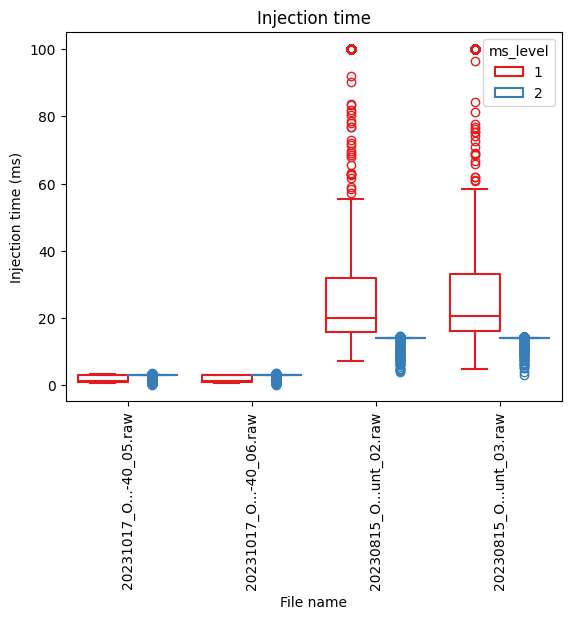

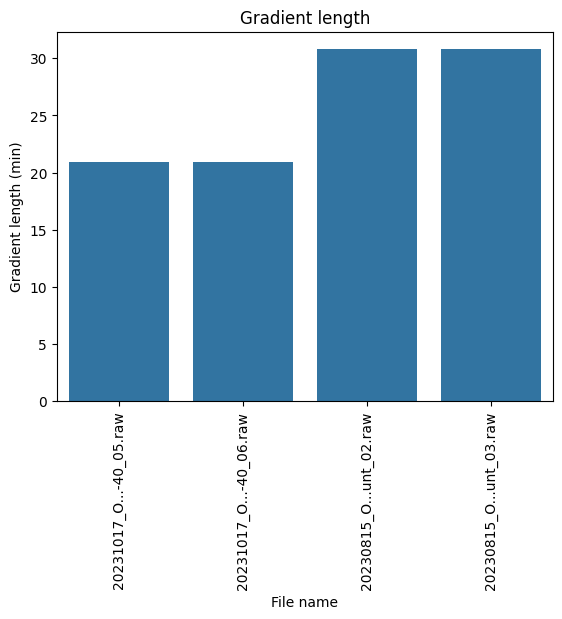

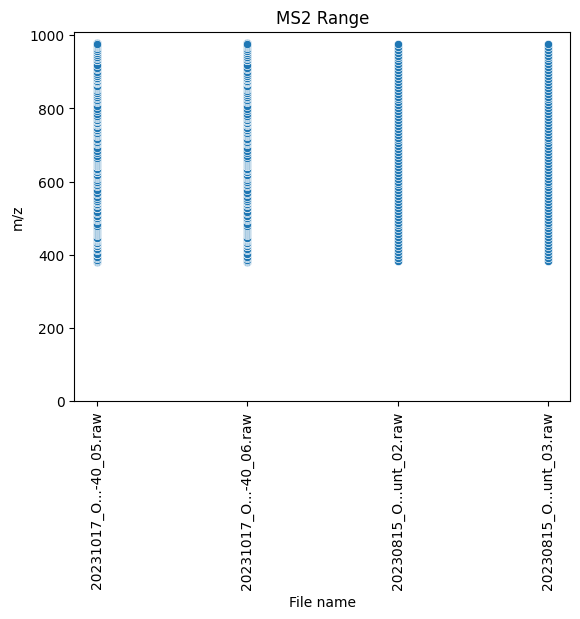

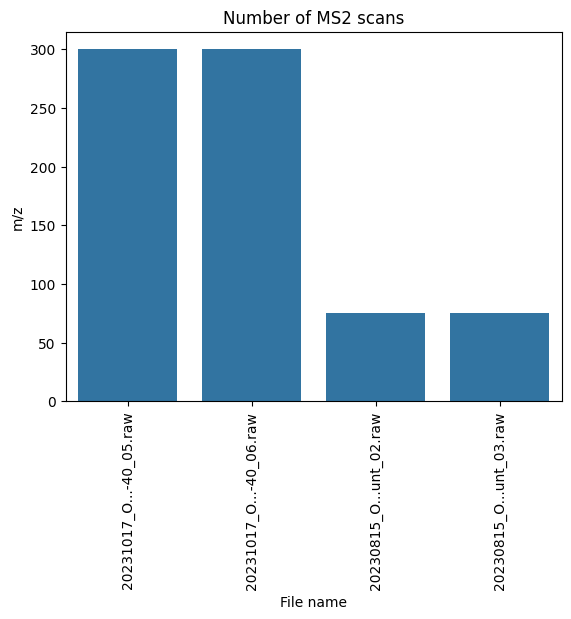

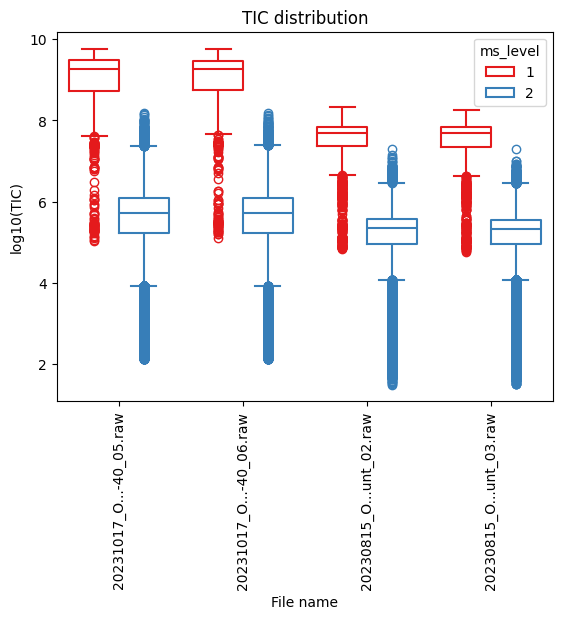

In [103]:
for metric in [ms2_injection_time, gradient_length, ms_range, ms_scan_num, tic_distribution]:
    metric(raw_file_list)